In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



In [2]:
def PolynomialRegression(degree=2, **kwargs):
    return Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('poly', PolynomialFeatures(degree=degree)),
    ('linreg', LinearRegression(fit_intercept=False))
    ])

## 9. Data analysis lab

Now, put together everything that you've learned over the last few units (prediction error, bias and variance; methods for estimating test/prediction error; regularization techniques) and apply it to a data analysis problem.  Returning to the diabetes dataset, your goal is to create a machine learning model that can accurately predict the diabetes risk.

In [3]:
from sklearn.datasets import load_diabetes
X_diabetes, y_diabetes = load_diabetes(return_X_y=True)

In [17]:
print(X_diabetes.shape)
print(y_diabetes.shape)

(442, 10)
(442,)


In [4]:
df = load_diabetes(as_frame=True)
df.frame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


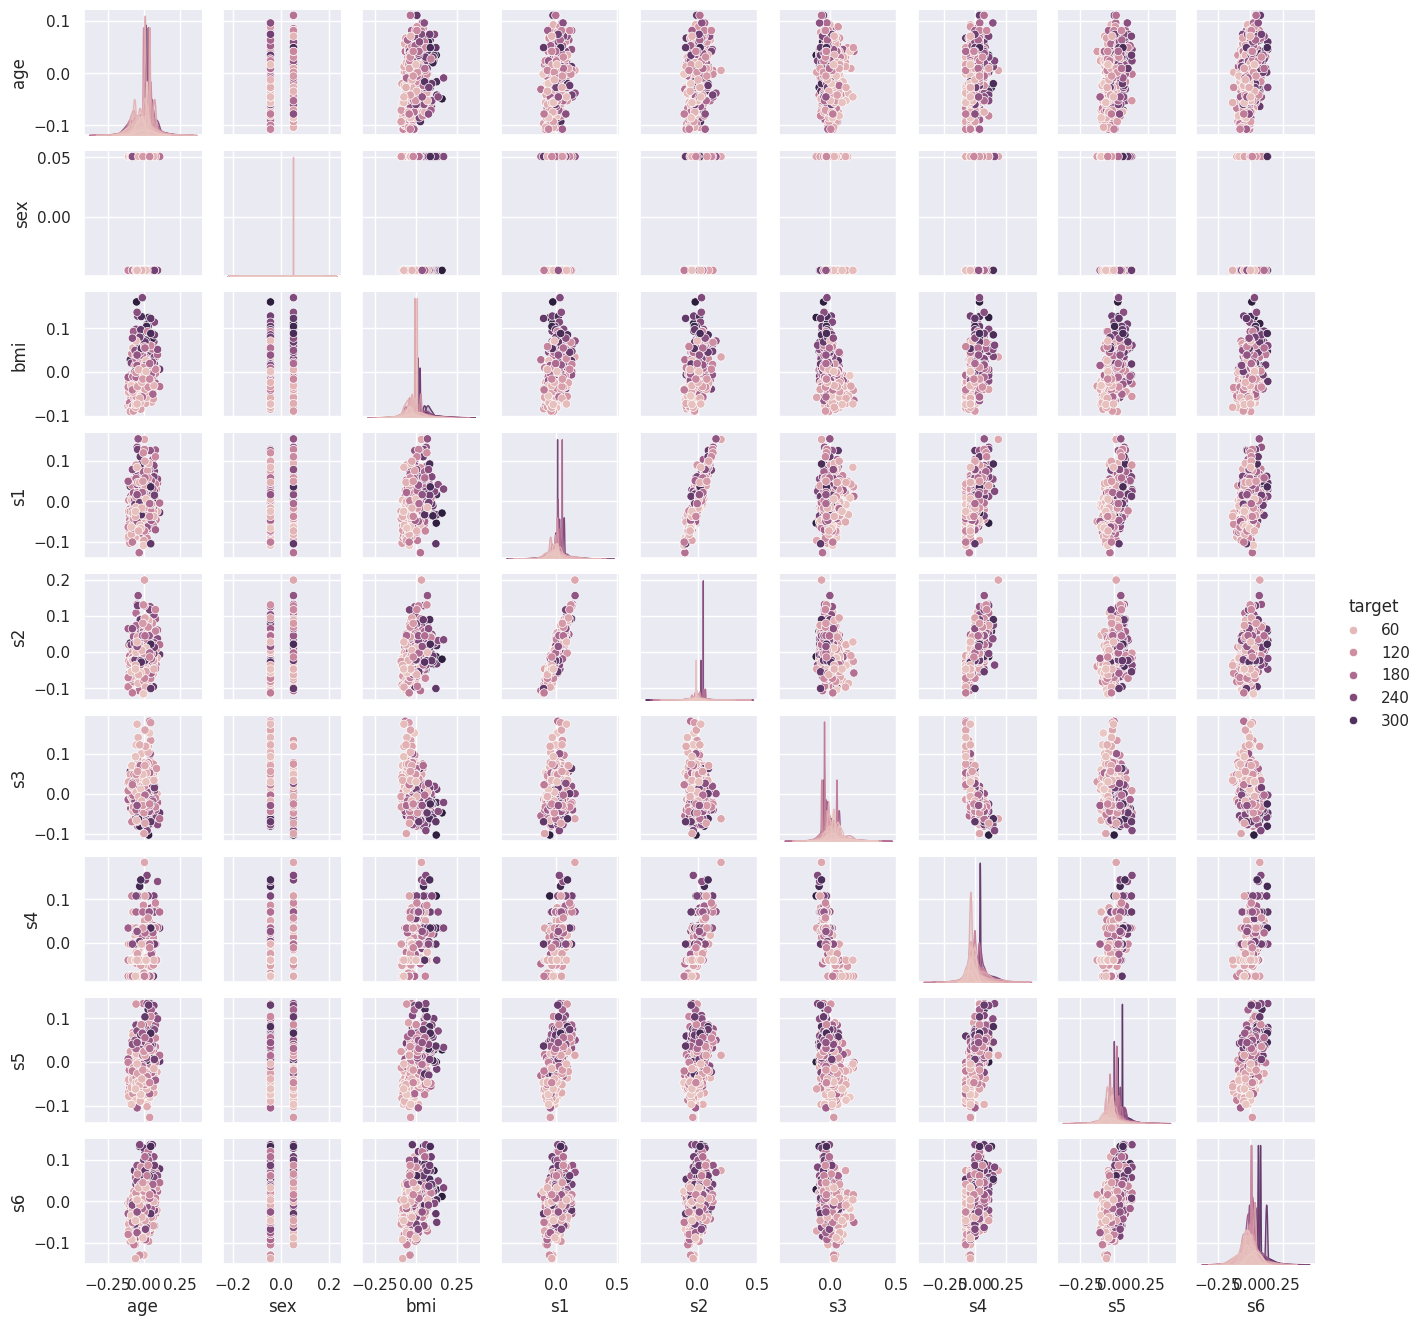

In [ ]:
%matplotlib inline

import seaborn as sns; sns.set()

#s1 and s1 correlate somewhat

sns.pairplot(data=df.frame,
             x_vars=['age','sex','bmi','s1','s2','s3','s4','s5','s6'],
             y_vars=['age','sex','bmi','s1','s2','s3','s4','s5','s6'],
             hue='target', size=1.5)


In [ ]:
df.frame.isna().sum()
#No NAN in the data

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [19]:
# Create and fit a simple LinearRegression model
X = X_diabetes
y = y_diabetes

model = LinearRegression()
model.fit(X,y)
# Create and fit a simple LinearRegression model


def mse(model, X, y):
    y_hat = model.predict(X)
    err = np.mean((y - y_hat)**2)
    return err

print('R^2:', model.score(X, y), 'MSE:', mse(model, X, y))

R^2: 0.5177484222203499 MSE: 2859.69634758675


In [18]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, random_state=1) #Default at .25
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


In [9]:
kf = KFold(n_splits=5)

res1 = cross_val_score(model, X, y, cv=kf)
cv_r2 = np.mean(res1)
res2 = cross_val_score(model, X, y, cv=kf, scoring=mse)
cv_mse = np.mean(res2)

print('c-v R^2:', cv_r2, 'c-v MSE:', cv_mse)

c-v R^2: 0.48231643590864215 c-v MSE: 2993.0813104693307


In [7]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, random_state=1)

# Setup out model
model = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('linreg', LinearRegression(fit_intercept=False))
])

model.fit(X_train,y_train)

print(f'Training data score: {model.score(X_train,y_train)}')
print(f'Testing data score: {model.score(X_test,y_test)}')




Training data score: 0.5359163748137687
Testing data score: 0.4439690125828367
